In [ ]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[0]

array([6], dtype=uint8)

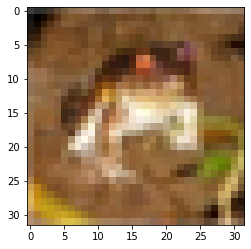

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
num_class = y_test.shape[1] #10

In [ ]:
X_train.shape[1:]

(32, 32, 3)

## Building the *Model*

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(num_class, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_9 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)       

# Training the model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 12s 12ms/step - loss: 1.5121 - accuracy: 0.4630 - val_loss: 1.2274 - val_accuracy: 0.5563
Epoch 2/30
782/782 [==============================] - 8s 11ms/step - loss: 1.0670 - accuracy: 0.6269 - val_loss: 0.9544 - val_accuracy: 0.6614
Epoch 3/30
782/782 [==============================] - 8s 11ms/step - loss: 0.9073 - accuracy: 0.6839 - val_loss: 0.8350 - val_accuracy: 0.7057
Epoch 4/30
782/782 [==============================] - 8s 11ms/step - loss: 0.8243 - accuracy: 0.7112 - val_loss: 0.8504 - val_accuracy: 0.7109
Epoch 5/30
782/782 [==============================] - 8s 11ms/step - loss: 0.7548 - accuracy: 0.7401 - val_loss: 0.7435 - val_accuracy: 0.7464
Epoch 6/30
782/782 [==============================] - 8s 11ms/step - loss: 0.7080 - accuracy: 0.7530 - val_loss: 0.6837 - val_accuracy: 0.7649
Epoch 7/30
782/782 [==============================] - 8s 11ms/step - loss: 0.6688 - accuracy: 0.7667 - val_loss: 0.6322 - val_accuracy: 0.781

In [ ]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


In [ ]:
import pandas as pd

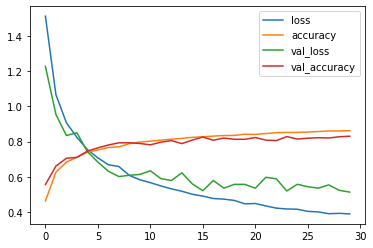

In [ ]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show>

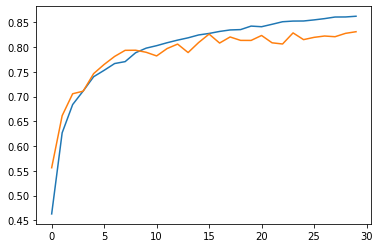

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [ ]:
model.save('CNN_cifar10.h5')

In [ ]:
model2 = load_model('CNN_cifar10.h5')

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
import numpy as np
import seaborn as sns; sns.set()

In [ ]:
np.argmax(model2.predict(X_test[0:10])[0])

3

In [ ]:
labels[3]

'cat'

In [ ]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)


(10000, 10)
[3 8 8 ... 5 1 7]


In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

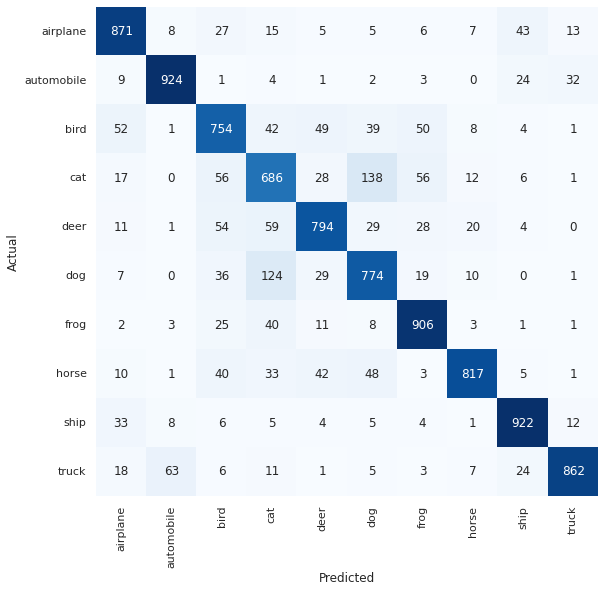

In [ ]:
# Predicting test data
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

#y_test = np.argmax(y_test, axis = 1)


# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

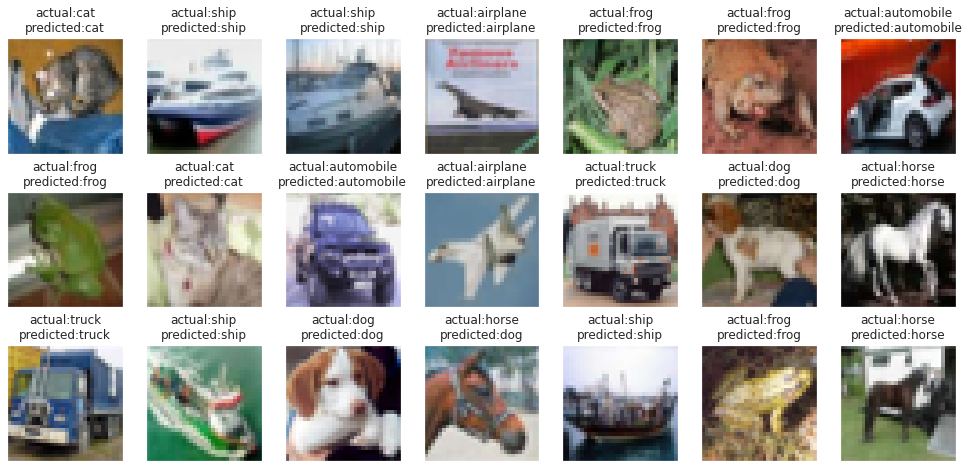

In [ ]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()